# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
units = "&units=metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temperature = []
wind_speed = []
citay = []
i=0
for city in cities:
    query_url = base_url + city + "&APPID=" + api_key + units
    i+=1
    try:
        response = requests.get(query_url).json()
        print(f"Processing Record {i} | {city}")
        try:
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            max_temperature.append(response['main']['temp_max'])
            wind_speed.append(response['wind']["speed"])
            citay.append(city)
        except KeyError:
            print("value not found...skipping")
    except NameError:
        print("city not found...skipping")
        
    
    

Processing Record 1 | ushuaia
Processing Record 2 | saskylakh
Processing Record 3 | amberley
Processing Record 4 | klyuchi
Processing Record 5 | sorvag
value not found...skipping
Processing Record 6 | rikitea
Processing Record 7 | hobart
Processing Record 8 | bredasdorp
Processing Record 9 | alta floresta
Processing Record 10 | hudson bay
Processing Record 11 | lebu
Processing Record 12 | san cristobal
Processing Record 13 | port alfred
Processing Record 14 | muskegon
Processing Record 15 | noumea
Processing Record 16 | barentsburg
value not found...skipping
Processing Record 17 | faanui
Processing Record 18 | bethel
Processing Record 19 | bluff
Processing Record 20 | punta arenas
Processing Record 21 | hambantota
Processing Record 22 | glubokoe
value not found...skipping
Processing Record 23 | beringovskiy
Processing Record 24 | shankargarh
Processing Record 25 | hwange
Processing Record 26 | mataura
Processing Record 27 | tuatapere
Processing Record 28 | busselton
Processing Record 2

Processing Record 228 | matagami
Processing Record 229 | rovaniemi
Processing Record 230 | skibbereen
Processing Record 231 | bonavista
Processing Record 232 | upernavik
Processing Record 233 | sylacauga
Processing Record 234 | manzil jamil
value not found...skipping
Processing Record 235 | ucluelet
Processing Record 236 | harnosand
Processing Record 237 | bengkulu
value not found...skipping
Processing Record 238 | hay river
Processing Record 239 | dombarovskiy
Processing Record 240 | nanortalik
Processing Record 241 | half moon bay
Processing Record 242 | batagay-alyta
Processing Record 243 | sayyan
Processing Record 244 | batagay
Processing Record 245 | faenza
Processing Record 246 | ponta do sol
Processing Record 247 | alyangula
Processing Record 248 | islamkot
Processing Record 249 | mayo
Processing Record 250 | hualmay
Processing Record 251 | seoul
Processing Record 252 | hithadhoo
Processing Record 253 | sistranda
Processing Record 254 | romitan
Processing Record 255 | mount gamb

Processing Record 456 | rio grande
Processing Record 457 | tidore
value not found...skipping
Processing Record 458 | ipixuna
Processing Record 459 | okha
Processing Record 460 | kinablangan
Processing Record 461 | vieques
Processing Record 462 | la ronge
Processing Record 463 | plaster rock
Processing Record 464 | acuna
value not found...skipping
Processing Record 465 | tecpan
Processing Record 466 | ordynskoye
Processing Record 467 | velyka oleksandrivka
Processing Record 468 | fevralsk
value not found...skipping
Processing Record 469 | ban nahin
Processing Record 470 | benguela
Processing Record 471 | boguchany
Processing Record 472 | kahului
Processing Record 473 | akdepe
Processing Record 474 | chokurdakh
Processing Record 475 | camacha
Processing Record 476 | grand gaube
Processing Record 477 | turayf
Processing Record 478 | jalu
Processing Record 479 | sungaipenuh
Processing Record 480 | port hardy
Processing Record 481 | bowen
Processing Record 482 | thabazimbi
Processing Record

In [17]:
len(citay)

546

In [19]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city":citay,
    "cloudiness (%)": cloudiness,
    "country":country,
    "date":date,
    "humidity (%)":humidity,
    "latitude":latitude,
    "longitude":longitude,
    "max_temperature (C)":max_temperature,
    "wind_speed (m/s)":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,cloudiness (%),country,date,humidity (%),latitude,longitude,max_temperature (C),wind_speed (m/s)
0,ushuaia,40,AR,1552222800,72,-54.81,-68.31,15.00,5.79
1,saskylakh,48,RU,1552227015,68,71.97,114.09,-23.21,4.94
2,amberley,56,NZ,1552227003,100,-43.15,172.73,14.44,1.50
3,klyuchi,0,RU,1552227016,71,52.25,79.17,-11.74,3.81
4,rikitea,64,PF,1552227017,100,-23.12,-134.97,24.27,4.39


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
weather_data.to_csv(header=True, index=True)

',city,cloudiness (%),country,date,humidity (%),latitude,longitude,max_temperature (C),wind_speed (m/s)\n0,ushuaia,40,AR,1552222800,72,-54.81,-68.31,15.0,5.79\n1,saskylakh,48,RU,1552227015,68,71.97,114.09,-23.21,4.94\n2,amberley,56,NZ,1552227003,100,-43.15,172.73,14.44,1.5\n3,klyuchi,0,RU,1552227016,71,52.25,79.17,-11.74,3.81\n4,rikitea,64,PF,1552227017,100,-23.12,-134.97,24.27,4.39\n5,hobart,40,AU,1552227016,67,-42.88,147.33,15.0,4.1\n6,bredasdorp,100,ZA,1552226466,56,-34.53,20.04,22.0,9.8\n7,alta floresta,20,BR,1552222800,74,-9.87,-56.08,28.0,3.1\n8,hudson bay,68,CA,1552226721,63,52.86,-102.4,-13.26,1.11\n9,lebu,0,ET,1552227018,22,8.96,38.73,22.19,3.86\n10,san cristobal,75,EC,1552226464,87,-0.39,-78.55,13.0,2.6\n11,port alfred,92,ZA,1552226983,81,-33.59,26.89,21.67,3.13\n12,muskegon,90,US,1552227019,80,43.23,-86.25,2.22,7.7\n13,noumea,0,NC,1552224600,88,-22.28,166.46,23.0,1.0\n14,faanui,20,PF,1552227021,100,-16.48,-151.75,27.62,3.31\n15,bethel,90,US,1552225980,74,60.79,-161.76,2.0,3.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

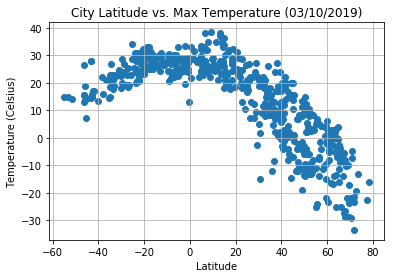

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["max_temperature (C)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/10/2019)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.MaxTemperature03102019.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

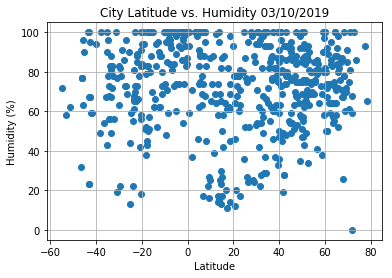

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 03/10/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Humidity03102019.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

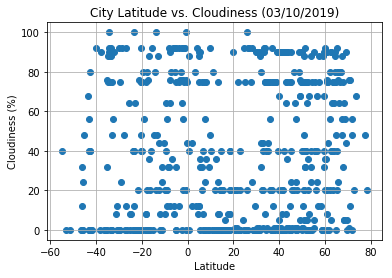

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/10/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Cloudiness03102019.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

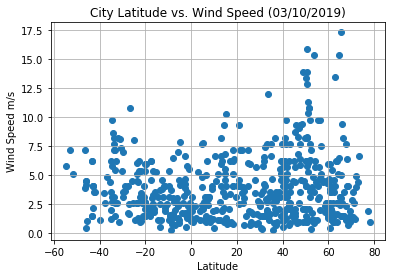

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["wind_speed (m/s)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/10/2019)")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.WindSpeed03102019.png")

# Show plot
plt.show()